<h1> MTH4000 Programming in Python I</h1>
<h2> Week 10 Lab Workbook</h2>
<h3><em> Dr Matthew Lewis and Prof. Thomas Prellberg </em></h3>

In these exercises, we will look deeper into dealing with composite data and NumPy.

<h2> Exercise 1: <em>Hypercubes</em> </h2>

Hypercubes are generalisations of three-dimensional cubes into other dimensions.

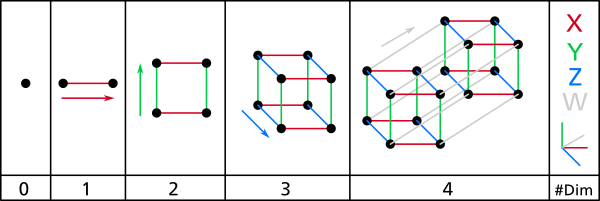

We successively get point, line, square, cube, tesseract, ...

The figure suggests that we can build up a hypercube of dimension $d+1$ by connecting two copies of a hypercube of dimension $d$.  This setup appears to lend itself to a recursive argument.

While it is hard to visualise constructions in dimensions above three, there is a very easy way to describe a $d$-dimensional hypercube: the coordinates of each of the $2^d$ corners are given by a sequence of $d$ zeros and ones.  In other words, we can use it to visualise binary numbers.

<h3> Exercise 1.1: <em> Hypercube Corners </em> </h3>

Write a function <code>hypercube_corners</code> that accepts a non-negative integer $d$ and returns a list of coordinates of all $2^d$ corners of a $d$-dimensional hypercube.

There are many ways of doing this.  One way is to take the coordinates for a $(d-1)$-dimensional hypercube and append a zero or a one.  Another way is to use bitwise logic.  All you need to know is that the expression <code>x <span style="color: rgb(170, 34, 255); font-weight: bold;">&</span> <span style="color: rgb(0, 136, 0);">2</span><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span>k</code> is non-zero if the binary expansion of the value $x$ contains $2^k$.

In [1]:
def hypercube_corners(d):
    # List to store the corners
    corners = []
    
    # There are 2^d corners in a d-dimensional hypercube
    for i in range(2**d):
        # Generate the binary representation of i, padded to d bits
        corner = [int(bit) for bit in bin(i)[2:].zfill(d)]
        corners.append(corner)
    
    return corners

<h3> Exercise 1.2: <em> One-Liner for Hypercube Corners <span style="color: red;">(Difficult)</span></em> </h3>

Write a one-line <code><span style="color: rgb(0, 128, 0); font-weight: bold;">lambda</span></code> function <code>hypercube_corners</code> that completes the task set in Exercise 1.1.

In [15]:
hypercube_corners = lambda d: [[(x >> i) & 1 for i in range(d)] for x in range(2**d)]

<h3> Exercise 1.3: <em> Hypercube Debugging </em> </h3>

A coder has decided to code up the above problem in the following way.

In [2]:
bit = lambda x, k: int(x&2**k>0) # Returns one if x contains 2^k.

def hypercube_corners(d):
    l = [[]]*2**d # Create a list with 2^d empty lists to append to individually.
    for k in range(d): # For all the coordinates.
        for x in range(2**d): # For all the points.
            l[x].append(bit(x,k)) # Append zero or one to each list.
    return l

for d in range(4):
    print(d, hypercube_corners(d))

0 [[]]
1 [[0, 1], [0, 1]]
2 [[0, 1, 0, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1, 1]]
3 [[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]]


The idea seems sound, but the results are clearly incorrect. Identify the problem and fix it.

In [3]:
bit = lambda x, k: int(x & 2**k > 0)  # Returns one if x contains 2^k.

def hypercube_corners(d):
    l = [[] for _ in range(2**d)]  # Create a list with 2^d separate empty lists.
    for k in range(d):  # For all the coordinates.
        for x in range(2**d):  # For all the points.
            l[x].append(bit(x, k))  # Append zero or one to each list.
    return l

for d in range(4):
    print(d, hypercube_corners(d))

0 [[]]
1 [[0], [1]]
2 [[0, 0], [1, 0], [0, 1], [1, 1]]
3 [[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1]]


<h3> Exercise 1.4: <em> Hamming Distance </em> </h3>

The Hamming distance is the distance between two binary numbers as measured by the number of differing bits. It represents the minimal number of times a bit needs to be changed in order to transform one number into the other.

Geometrically, each such bit change corresponds to an edge traversal on a hypercube, so this is the same as the minimal number of edges on the hypercube that separate the two corresponding corners. 

Write a function <code>hamming</code> that accepts two positive integers <code>x</code> and <code>y</code>, and computes their Hamming distance when they are written as binary numbers. 

(<b>Note:</b> If you use the <code>bin</code> function before the comparison you might need to pad the strings with leading zeros.)

In [ ]:
def hamming(x, y):
    return bin(x ^ y).count('1')

<h3> Exercise 1.5: <em> One-Liner for Hamming Distance </em> </h3>

Write a one-line <code><span style="color: rgb(0, 128, 0); font-weight: bold;">lambda</span></code> function <code>hamming</code> that completes the task set in Exercise 1.4.

In [4]:
hamming = lambda x, y: bin(x ^ y).count('1')

<h2> Exercise 2: <em>ChatGPT</em> </h2>

<h3> Exercise 2.1: <em> ChatGPT's Hypercube Debugging </em> </h3>

Ask ChatGPT to provide feedback on the flawed code in Exercise 1.3.  (Do not do this before you have found the error in the code yourself.)

<h3> Exercise 2.2: <em> ChatGPT's Hypercube Counselling </em> </h3>

Ask ChatGPT to explain the (fixed) code to you. You will likely get a high-quality response.

<h2> Exercise 3: <em>Central Limit Theorem</em> </h2>

For the next exercise, we will need the following imports.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In <em>MTH4500 Probability and Statistics</em> you will learn that repeated sampling from some distribution with mean $\mu$ and variance $\sigma^2$ will be well-approximated by a normal distribution, in the sense that the sum of random variables $X_k$ sampled from that distribution is for large $N$ close to a normal distributed random variable $Y$ with mean $n\mu$ and variance $n\sigma^2$:

$$X=X_1+X_2+\ldots+X_n\approx Y$$

In this exercise we will numerically test this assertion.

NumPy allows for easy generation of arrays of random numbers. For example, if we want to have $10000$ random numbers drawn from the uniform distribution on $[0,1]$, we can use the following code.

In [6]:
# Generate 10000 random numbers.
a = np.random.uniform(0, 1, 10000)

Instead of looking at these random numbers, we can visualise them with histograms using the <code>hist</code> function in the PyPlot module, with optional parameters such as the number of bins and the range that the bins should cover.

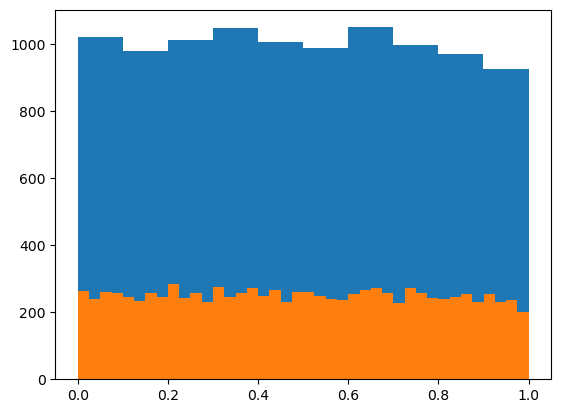

In [7]:
# Draw default histogram.
plt.hist(a)

# Draw histogram using 40 bins.
plt.hist(a, range=[0,1], bins = 40)
plt.show()

Clearly, the more bins we use, the fewer samples we will find in each of them.

The uniform distribution on $[0,1]$ has mean $\mu=1/2$ and variance $\sigma^2=1/12\approx0.0833$. We can confirm this quickly by computing mean and variance of our sampled $10000$ random numbers.

In [8]:
print (f"mean: {a.mean():.4f}, variance: {a.var():.4f}")

mean: 0.4945, variance: 0.0818


To work towards the Central Limit Theorem, let us first consider taking the sum of two random variables. To practice working with NumPy, we created a $2 \times 10000$ array filled with random numbers and then take the column sum.

In [9]:
# Generate 2x10000 random numbers.
a2 = np.random.uniform(0, 1, (2, 10000))
a2_sum = a2.sum(axis = 0)

And again, instead of looking at the numbers, it is more instructive to plot the histogram.

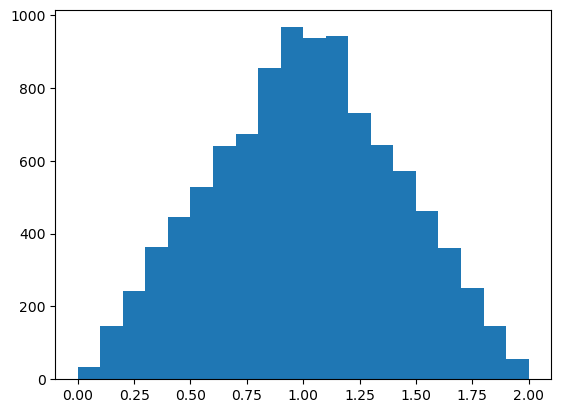

In [10]:
# Draw histogram.
plt.hist(a2_sum,bins=20,range=[0,2])
plt.show()

In [11]:
print (f"mean: {a2_sum.mean():.4f}, variance: {a2_sum.var():.4f}")

mean: 1.0082, variance: 0.1652


The mean and variance have roughly doubled, as expected. You may also recognise a piecewise linear tent-shaped distribution. 

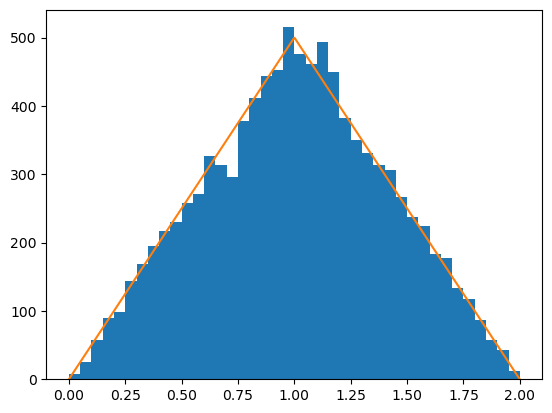

In [12]:
plt.hist(a2_sum, bins=40, range=[0,2])
x = np.linspace(0, 2, 1000)
y = 1-np.abs(1-x)
plt.plot(x, 500*y)
plt.show()

How did we arrive at a factor of $500$ in the plot of the distribution?

Clearly $1-|1-x|$ is normalised to $1$, so to map it to match the histogram, we need to multiply it with the sample size $10000$ and the bin width $2/40$, which gives $500$.

<h3> Exercise 3.1: <em> Verify the Statement of the Central Limit Theorem </em> </h3>

Of course the Central Limit Theorem is not just a statement about the growth of the mean and the variance, but about a convergence to the normal distribution. In other words, the distribution of $X=\sum_{i=1}^n X_i$ should be normally distributed. To test this, we need to not only take the sum of two random variables, as in our example above, but of a larger number of these.

For $n=10$, $30$, and $100$, plot the resulting histograms and the corresponding <a href="https://en.wikipedia.org/wiki/Normal_distribution">normal distribution</a> (make sure to scale this appropriately by the number of samples).

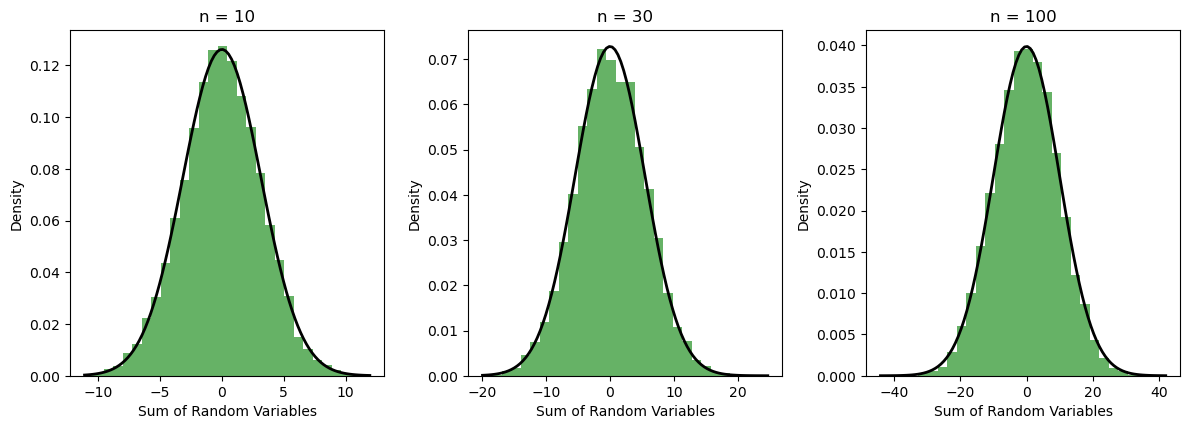

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to generate sums of random variables
def generate_sum_of_randoms(n, samples=10000):
    # Generate random variables (standard normal)
    random_variables = np.random.randn(samples, n)
    # Calculate the sum of each row (i.e., sum of n random variables)
    sums = random_variables.sum(axis=1)
    return sums

# Plotting function
def plot_histograms():
    n_values = [10, 30, 100]  # Values for n (number of random variables)
    samples = 10000  # Number of samples
    plt.figure(figsize=(12, 8))

    for i, n in enumerate(n_values):
        sums = generate_sum_of_randoms(n, samples)
        
        # Plot histogram
        plt.subplot(2, 3, i+1)
        plt.hist(sums, bins=30, density=True, alpha=0.6, color='g')
        
        # Plot normal distribution
        mean = 0  # Mean of the normal distribution
        std_dev = np.sqrt(n)  # Standard deviation for the sum of n random variables
        x = np.linspace(min(sums), max(sums), 100)
        plt.plot(x, norm.pdf(x, mean, std_dev), 'k-', lw=2)
        
        # Title and labels
        plt.title(f'n = {n}')
        plt.xlabel('Sum of Random Variables')
        plt.ylabel('Density')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_histograms()


<h3> Exercise 3.2: <em> Repeat this for the Exponential Distribution with Parameter $\lambda = 1$ </em> </h3>

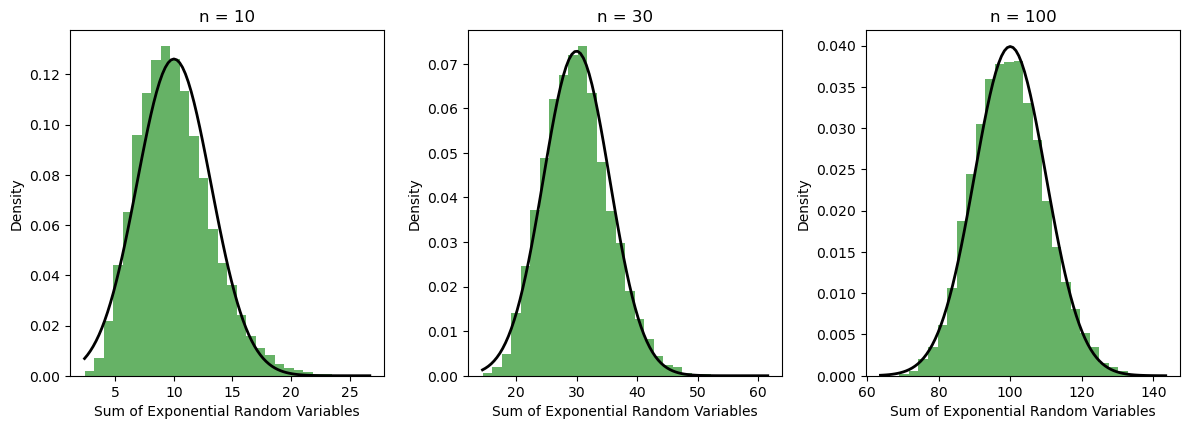

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to generate sums of exponential random variables
def generate_sum_of_exponentials(n, samples=10000):
    # Generate exponential random variables (lambda = 1)
    random_variables = np.random.exponential(scale=1, size=(samples, n))
    # Calculate the sum of each row (i.e., sum of n exponential random variables)
    sums = random_variables.sum(axis=1)
    return sums

# Plotting function for exponential distribution sums
def plot_histograms():
    n_values = [10, 30, 100]  # Values for n (number of exponential random variables)
    samples = 10000  # Number of samples
    plt.figure(figsize=(12, 8))

    for i, n in enumerate(n_values):
        sums = generate_sum_of_exponentials(n, samples)
        
        # Plot histogram
        plt.subplot(2, 3, i+1)
        plt.hist(sums, bins=30, density=True, alpha=0.6, color='g')
        
        # Plot normal distribution
        mean = n  # Mean of the sum of n exponential random variables (since mean = n)
        std_dev = np.sqrt(n)  # Standard deviation for the sum of n exponential random variables
        x = np.linspace(min(sums), max(sums), 100)
        plt.plot(x, norm.pdf(x, mean, std_dev), 'k-', lw=2)
        
        # Title and labels
        plt.title(f'n = {n}')
        plt.xlabel('Sum of Exponential Random Variables')
        plt.ylabel('Density')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_histograms()


<h2> Feedback </h2>

Attempt all of these questions during Week 10. This worksheet will be discussed in detail on a Lab Walkthrough video to be posted to QMplus at the end of the week.

If you have any problems or questions, or simply you would like some feedback, then you can:

<ul>
    <li> Ask the tutors present in your IT Lab sessions.</li><br>
    <li> Ask the Student Forum on the module's QM Plus page.</li><br>
    <li> Email the lecturers for assistance.</li>
</ul>